Final Presentation Notebook

Datasets:

https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6

https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

https://data.wprdc.org/dataset/pbp-fire-arm-seizures/resource/e967381d-d7e9-48e3-a2a2-39262f7fa5c4

Our process of finding the best neighborhood involved finding the ones that are the safest. We used datasets that had information including arrest information, crime and police reports, and gun seizures. Each neighborhood has a count of the things we are measuring, and we combined them all into one metric using all 3 datasets.

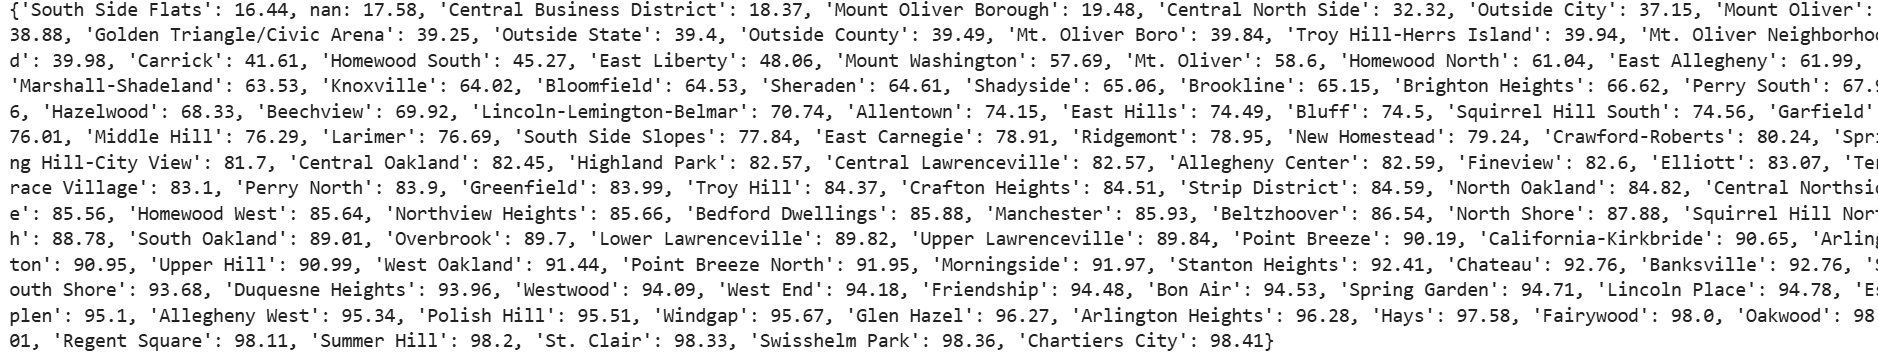

The picture above is the final outcome of combining all our data into one measurement of neighborhoods. Some of the neighborhoods seen at the top of the list (it's sorted in ascending order) are there because they were named differently in each dataset, or because they weren't included in each dataset for some reason or another. Other neighborhoods seen at the top of the list are there because they deserve to be based on their crime rate and public safety.

Our metric for finding the best neighborhoods was to measure the safety of each one. We used the datasets, "Neighborhoods with SNAP DATA", "Pittsburgh Police Arrest Data", and "Pittsburgh Police Firearm Seizures" to measure how safe a neighborhood was. Our thoughts were we don't want neighborhoods with a lot of crime, with a lot of people being arrested, and lots of firearms being seized. The SNAP dataset gave us information on how many violent crimes such as murders and assualts there were in each neighborhood, along with others such as burglary and grand-theft auto. The dataset of arrests allowed us to total the number of arrests in each neighborhood, and similarly with the gun seizures we were able to tally the amount of seizures in each neighborhood.

We decided to weight the metrics with a 40/40/20 scale. The SNAP data and Arrest Data being worth 40% of the total metric each, and the gun seizures being worth 20% of the metric. We decided on this because the SNAP data and Arrest data were able to directly link us to the amount of crime happening in each neighborhood, and we weighed the gun seizures lower since it didn't necessarily link to the amount of crime going on in each neighborhood.

In conclusion, using the data we sourced to find the best neighborhood in Pittsburgh has led us to Chartiers City. This conclusing was made using all of our data that we collected and analyzed, not anything to due with personal bias or personal selection.

Top 5 Cities and their rankings:

Chariters City - 98.41%

Swisshelm Park - 98.36%

St. Clair - 98.33%

Summer Hill - 98.2%

Regent Square - 98.11%

Overall these are all great cities to live in according to our metric, since our top neighborhood and fifth best neighborhood are only seperated by 0.3%

Seans Conclusion: I don't have a personal favorite neighborhood in Pittsburgh, so I can't really disagree with the rankings that have been made. Since I only moved here at the beginning of the school year I haven't had the chance to go to many different neighborhoods, and I've only lived in Oakland since being here so I have to agree with the data that we've come up with.

In [10]:
#Data from the first dataset, "Neighborhoods with SNAP data"
import pandas as pd
from math import isnan
snap = pd.read_csv('snapdata.csv')
seizures = pd.read_csv('firearm_seizures.csv')
arrest = pd.read_csv('arrestdata.csv')

neighborhoodCrimes = {}
neighborhoodReports = {}

#Calculating the number of serious crimes committed in each neighborhood using the SNAP data

for index,row in snap.iterrows():
    name = row["Neighborhood_2010_HOOD"]
    murders = row["SNAP_All_csv__Murder__2010_"]
    rape = row["SNAP_All_csv__Rape__2010_"]
    robbery = row["SNAP_All_csv__Robbery__2010_"]
    aggAsslt = row["F_Agr__Assault__2010_"]
    burglary = row["SNAP_All_csv__Burglary__2010_"]
    autoTheft = row["SNAP_All_csv__Auto_Theft__2010_"]

#Crimes being calculated /\
    
    crimes = murders + rape + robbery + aggAsslt + burglary + autoTheft
    
    if name in neighborhoodCrimes:
        neighborhoodCrimes[name] += crimes
    else:
        neighborhoodCrimes[name] = crimes

#Crimes being reported in each neighborhood
    
    policeReports = row["SNAP_All_csv__Part_1__Major_Cri"]
    policeReports2 = row["SNAP_All_csv__Part_2_Reports__2"]
    policeReports3 = row["SNAP_All_csv__Other_Police_Repo"]
    
    totalReports = policeReports + policeReports2 + policeReports3

    if name in neighborhoodReports:
        neighborhoodReports[name] += totalReports
    else:
        neighborhoodReports[name] = totalReports

#Combining the two datasets into one total incidents dictionary
totalIncidents = {}
for neighborhood in neighborhoodReports:
    if neighborhood in totalIncidents:
        totalIncidents[neighborhood] += neighborhoodReports[neighborhood] + neighborhoodCrimes[neighborhood]
    else:
        totalIncidents[neighborhood] = neighborhoodReports[neighborhood] + neighborhoodCrimes[neighborhood]

#Getting maximum number of crimes to use as a "worst case" so that we can compare neighborhoods
worst = totalIncidents[max(totalIncidents, key=totalIncidents.get)]

#Using our total incidents dictionary and worst neighborhood variable to put each neighborhood on a scale, with 0 being the least incidents and 100 being the most
bestNeighborhood = {}
for neighborhood in totalIncidents:
    if neighborhood not in bestNeighborhood:
        val = round((totalIncidents[neighborhood]) / worst * 100, 2)
        bestNeighborhood[neighborhood] = val

#Sorting from least crime to most
bestNeighborhood = dict(sorted(bestNeighborhood.items(), key=lambda item: item[1]))

source1 = {}
for i in bestNeighborhood:
    if i not in source1:
        val = round(100 - bestNeighborhood[i], 2)
        source1[i] = val 

In [ ]:
#Data from the second dataset "Firearms Seizure Data"
neighborhoods = {}

#counting number of seizures per neighborhoods
for index,row in seizures.iterrows():
    name = row["neighborhood"]
    total = row["total_count"]

    if name in neighborhoods:
        neighborhoods[name] += total
    else:
        neighborhoods[name] = total

#removing the values that didn't have a neighborhood specified in the csv
hoods = filter(lambda k: not pd.isna(k), neighborhoods)
hoods = {k: neighborhoods[k] for k in neighborhoods if not pd.isna(k)}

#finding the most seizures in a neighborhoods
mostSeizures = hoods[max(hoods, key=hoods.get)]

#sorting from least seizures to most
sortedHoods = dict(sorted(hoods.items(), key=lambda item: item[1]))

weights = {}
for hood in sortedHoods:
    if hood not in weights:
        val = round((sortedHoods[hood]) / mostSeizures * 100, 2)
        weights[hood] = val

source2 = {}
for i in weights:
    if i not in source2:
        val = 100 - weights[i]
        source2[i] = val

In [16]:
#Data from the third dataset, "Arrest Data"
arrestHoods = {}

for index,row in arrest.iterrows():
    name = row["INCIDENTNEIGHBORHOOD"]

    if name in arrestHoods:
        arrestHoods[name] += 1
    else:
        arrestHoods[name] = 1
mostArrests = arrestHoods[max(arrestHoods, key=arrestHoods.get)]
sortedArrests = dict(sorted(arrestHoods.items(), key=lambda item: item[1]))

source3 = {}
for hood in sortedArrests:
    if hood not in source3:
        val = round((sortedArrests[hood] / mostArrests) * 100, 2)
        val2 = round(100 - val, 2)
        source3[hood] = val2

In [19]:
#Combining all our data into one metric

allData = {}

#Giving the data from our first dataset a weight of 40% since we feel it's very important
for neighborhood in source1:
    val = round(source1[neighborhood] * .4, 2)
    if neighborhood in allData:
        allData[neighborhood] += val
    else:
        allData[neighborhood] = val

#Giving the data from our second dataset a weight of 20% since we feel it's less significant than the others
for neighborhood in source2:
    val = round(source2[neighborhood] * .2, 2)
    if neighborhood in allData:
        allData[neighborhood] += val
    else:
        allData[neighborhood] = val

#Giving the data from our third dataset a weight of 40% since we feel it's just as significant as the first
for neighborhood in source3:
    val = round(source3[neighborhood] * .4, 2)
    if neighborhood in allData:
        allData[neighborhood] += val
    else:
        allData[neighborhood] = val

#Cleaning the data by rounding the values to their second decimal point
for i in allData:
    allData[i] = round(allData[i], 2)

sortedData  = dict(sorted(allData.items(), key=lambda item: item[1]))

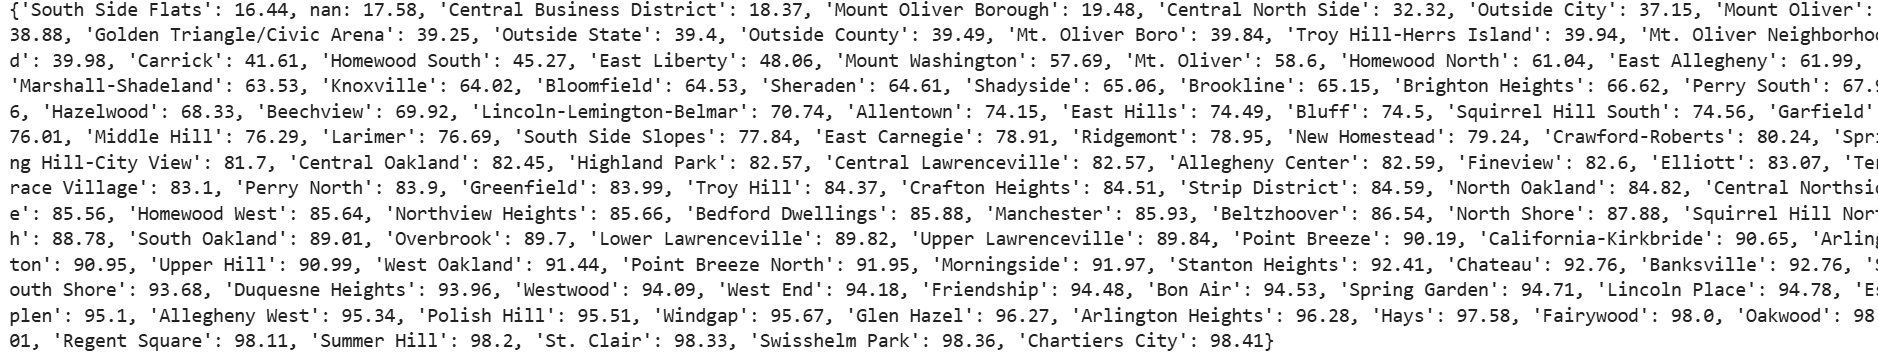

The picture above is the final outcome of combining all our data into one measurement of neighborhoods. Some of the neighborhoods seen at the top of the list (it's sorted in ascending order) are there because they were named differently in each dataset, or because they weren't included in each dataset for some reason or another. Other neighborhoods seen at the top of the list are there because they deserve to be based on their crime rate and public safety.

Our metric for finding the best neighborhoods was to measure the safety of each one. We used the datasets, "Neighborhoods with SNAP DATA", "Pittsburgh Police Arrest Data", and "Pittsburgh Police Firearm Seizures" to measure how safe a neighborhood was. Our thoughts were we don't want neighborhoods with a lot of crime, with a lot of people being arrested, and lots of firearms being seized. The SNAP dataset gave us information on how many violent crimes such as murders and assualts there were in each neighborhood, along with others such as burglary and grand-theft auto. The dataset of arrests allowed us to total the number of arrests in each neighborhood, and similarly with the gun seizures we were able to tally the amount of seizures in each neighborhood.

We decided to weight the metrics with a 40/40/20 scale. The SNAP data and Arrest Data being worth 40% of the total metric each, and the gun seizures being worth 20% of the metric. We decided on this because the SNAP data and Arrest data were able to directly link us to the amount of crime happening in each neighborhood, and we weighed the gun seizures lower since it didn't necessarily link to the amount of crime going on in each neighborhood.

In conclusion, using the data we sourced to find the best neighborhood in Pittsburgh has led us to Chartiers City. This conclusing was made using all of our data that we collected and analyzed, not anything to due with personal bias or personal selection.

Top 5 Cities and their rankings:

Chariters City - 98.41%

Swisshelm Park - 98.36%

St. Clair - 98.33%

Summer Hill - 98.2%

Regent Square - 98.11%

Overall these are all great cities to live in according to our metric, since our top neighborhood and fifth best neighborhood are only seperated by 0.3%

Seans Conclusion: I don't have a personal favorite neighborhood in Pittsburgh, so I can't really disagree with the rankings that have been made. Since I only moved here at the beginning of the school year I haven't had the chance to go to many different neighborhoods, and I've only lived in Oakland since being here so I have to agree with the data that we've come up with.